# Bank Customer Churn Prediction
In this notebook there is a work with Bank Customer Churn Prediction (DLU Course c.4) dataset from kaggle competition - https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-4

In [1]:
import pandas as pd
import numpy as np

from mlpeople.io.google_drive import download_file_iss

# download files from google drive
download_file_iss('1Xz-cqp6y-Y_oCiaSJeNsbU3-o5lM-5wY', output_path='./downloads/train.csv')
download_file_iss('1jsg2iPVphDMiHCEyqQeDSc4yDcMB3-r_', output_path='./downloads/test.csv')
download_file_iss('1tv0beG2n8cUQ6KcdaXhFzQI_Fd9640gg', output_path='./downloads/sample_submission.csv')

# read train.csv / show first 5 rows / show info
raw_df = pd.read_csv('downloads/train.csv', index_col=0)
display(raw_df.shape)
display(raw_df.head())
display(raw_df.info())

(15000, 13)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       15000 non-null  float64
 1   Surname          15000 non-null  object 
 2   CreditScore      15000 non-null  float64
 3   Geography        15000 non-null  object 
 4   Gender           15000 non-null  object 
 5   Age              15000 non-null  float64
 6   Tenure           15000 non-null  float64
 7   Balance          15000 non-null  float64
 8   NumOfProducts    15000 non-null  float64
 9   HasCrCard        15000 non-null  float64
 10  IsActiveMember   15000 non-null  float64
 11  EstimatedSalary  15000 non-null  float64
 12  Exited           15000 non-null  float64
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


None

## EDA

### Features

In [2]:
from mlpeople.eda.reporting import describe_dataframe

describe_dataframe(raw_df)

,column_id,data_type,unique_values,missing_values,mean,std,min,max
0,CustomerId,float64,6348,0,15691456.68,135205.03,1581102.00,15815690.00
1,Surname,object,764,0,NaN,NaN,NaN,NaN
2,CreditScore,float64,378,0,658.94,72.26,431.00,850.00
3,Geography,object,3,0,NaN,NaN,NaN,NaN
4,Gender,object,2,0,NaN,NaN,NaN,NaN
5,Age,float64,56,0,37.74,8.22,18.00,74.00
6,Tenure,float64,11,0,5.03,2.78,0.00,10.00
7,Balance,float64,3395,0,42729.79,59727.31,0.00,209767.31
8,NumOfProducts,float64,4,0,1.59,0.53,1.00,4.00
9,HasCrCard,float64,2,0,0.79,0.41,0.00,1.00


### Correlation numeric

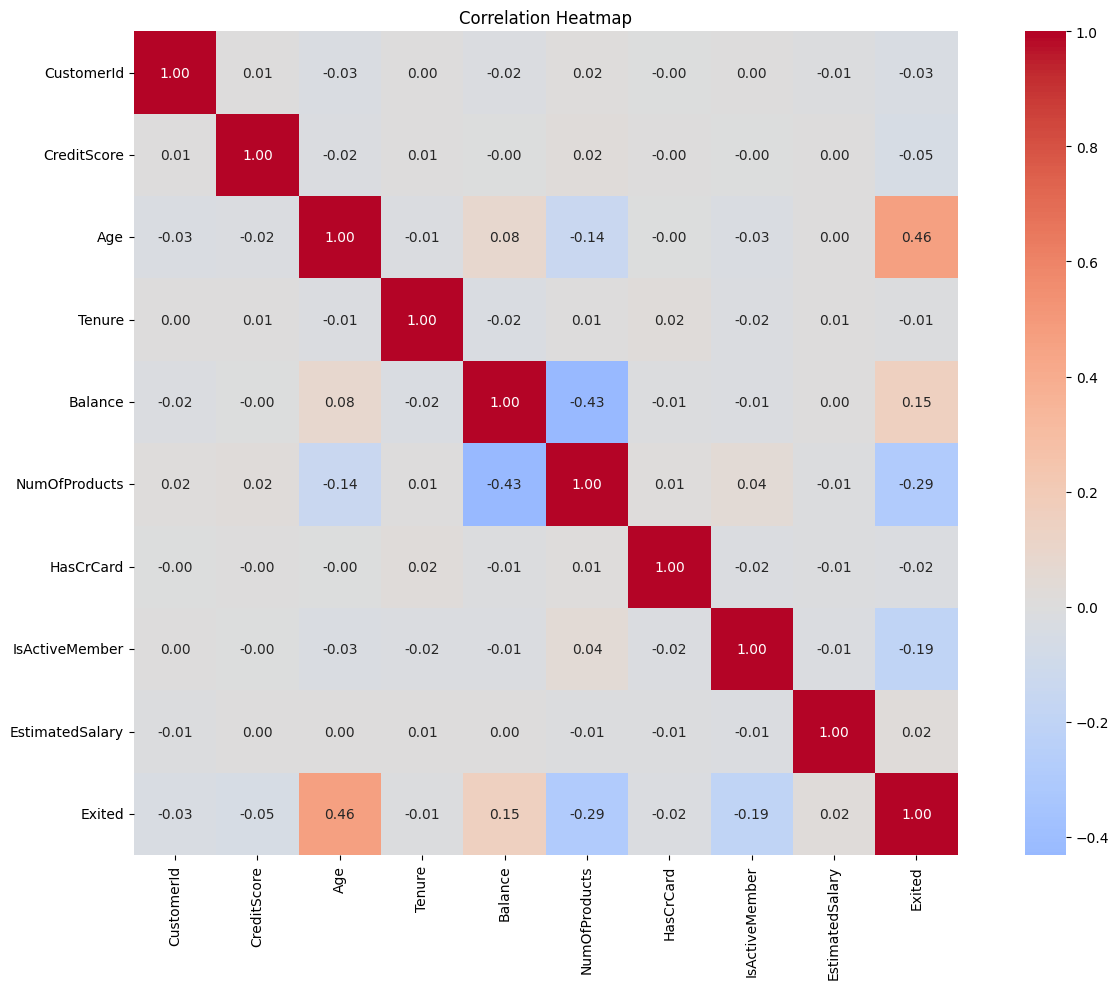

In [3]:
from mlpeople.visualization.relationships.correlation import plot_correlation_heatmap

target_col = 'Exited'

plot_correlation_heatmap(raw_df.drop('Exited', axis=1), y=raw_df[target_col])

### Categorical cols

#### Gender & Geography

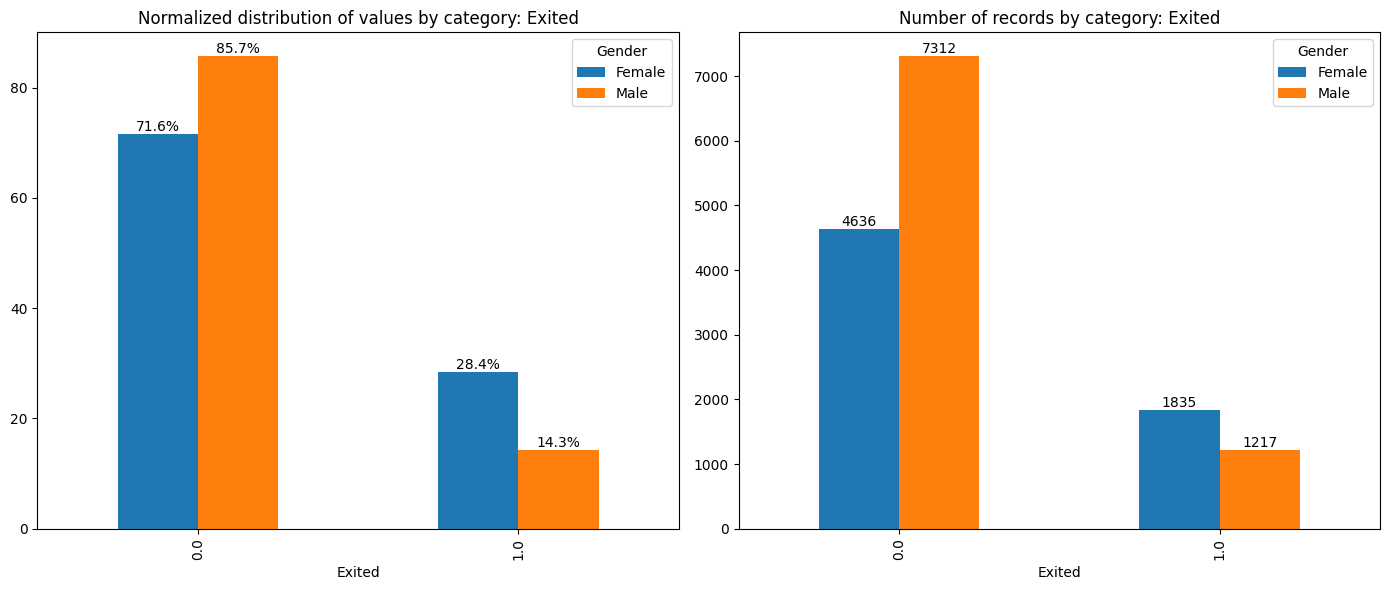

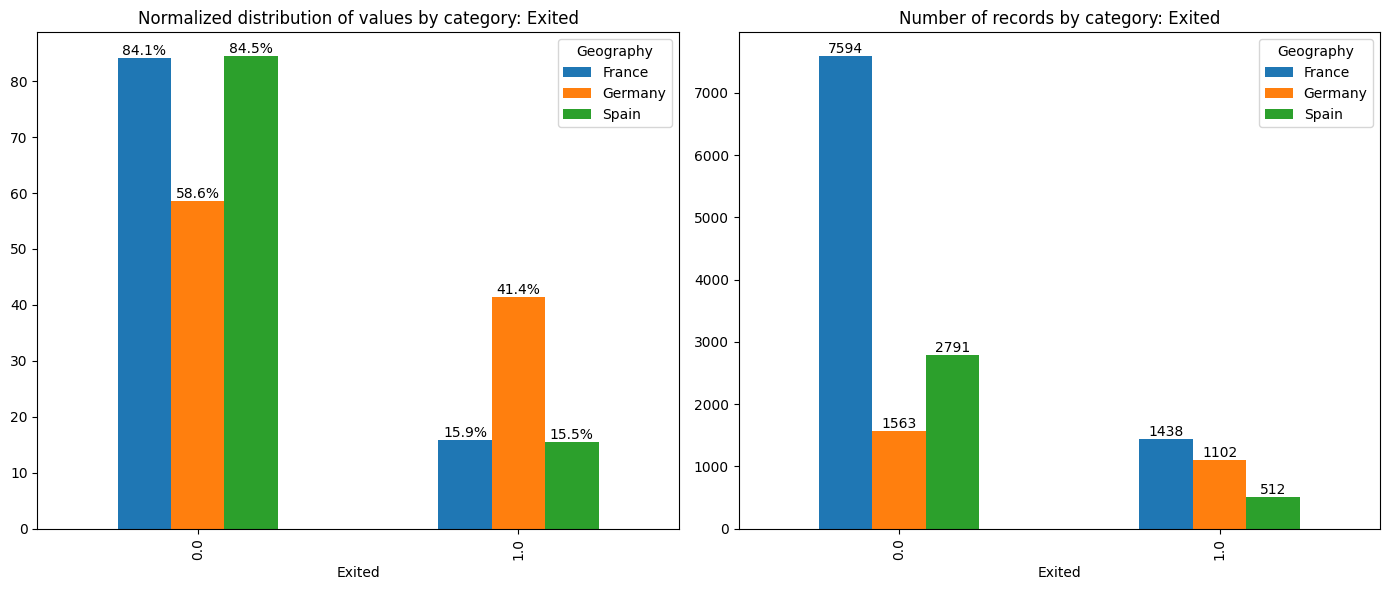

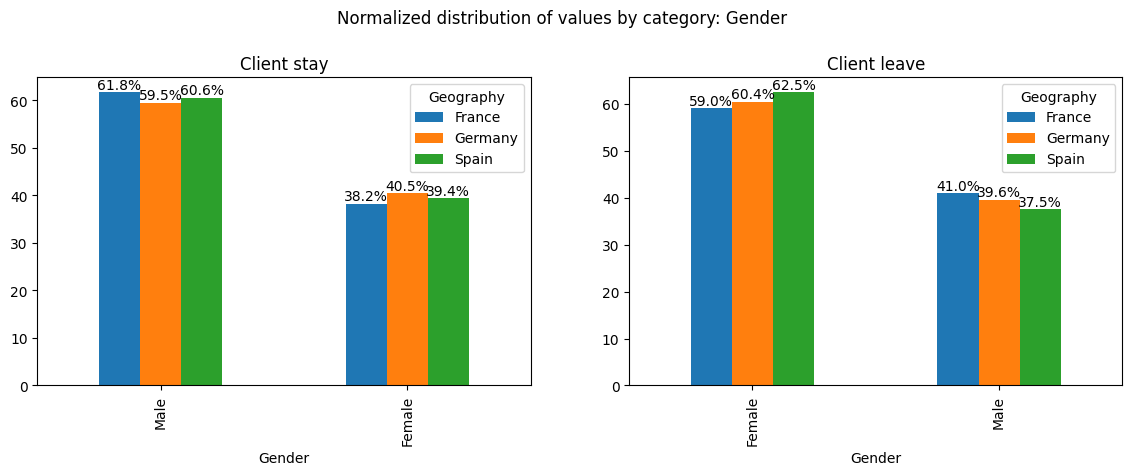

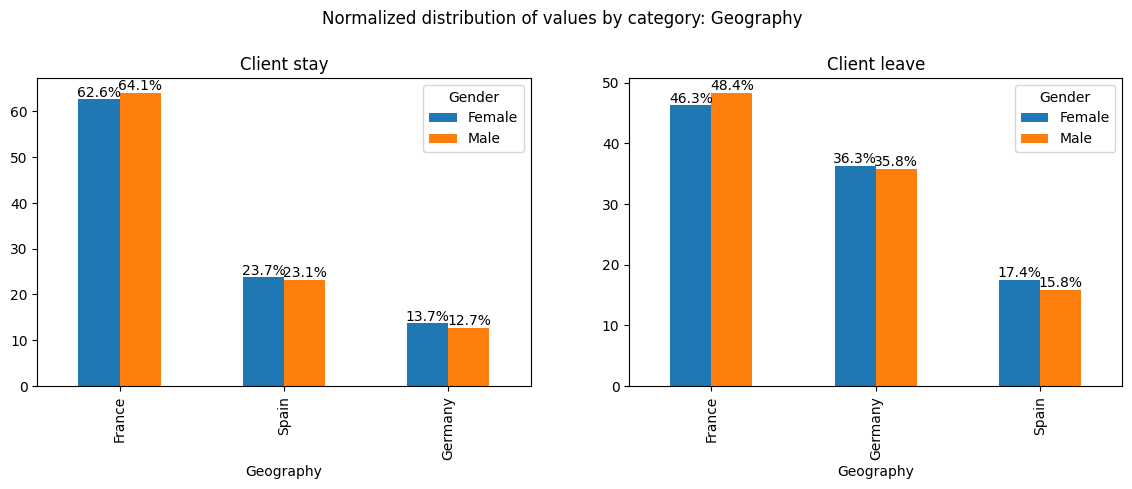

In [4]:
from mlpeople.visualization.categorical.countplots import draw_bi_cat_countplot, draw_bi_countplot_target


draw_bi_cat_countplot(
    raw_df, target_col, 'Gender'
)

draw_bi_cat_countplot(
    raw_df, target_col, 'Geography'
)

draw_bi_countplot_target(
    raw_df, 'Gender', hue_col='Geography',
    target_col=target_col, normalize=True,
    titles={
        0: 'Client stay',
        1: 'Client leave'
    })

draw_bi_countplot_target(
    raw_df, 'Geography', hue_col='Gender',
    target_col=target_col, normalize=True,
    titles={
        0: 'Client stay',
        1: 'Client leave'
    })


 - More "Male" than "Female" data in dataset
 - "Female" are more inclined to leave (exit)
 - More "France" than "Germany" and "Spain" data in dataset
 - "Germany" are more inclined to leave (exit)
 - "Gender" and "Geograpfy" seems to not have a lot of corralation between them
 - "Gender" and "Geograpfy" definetely should be included into model train input features

#### Surname ?

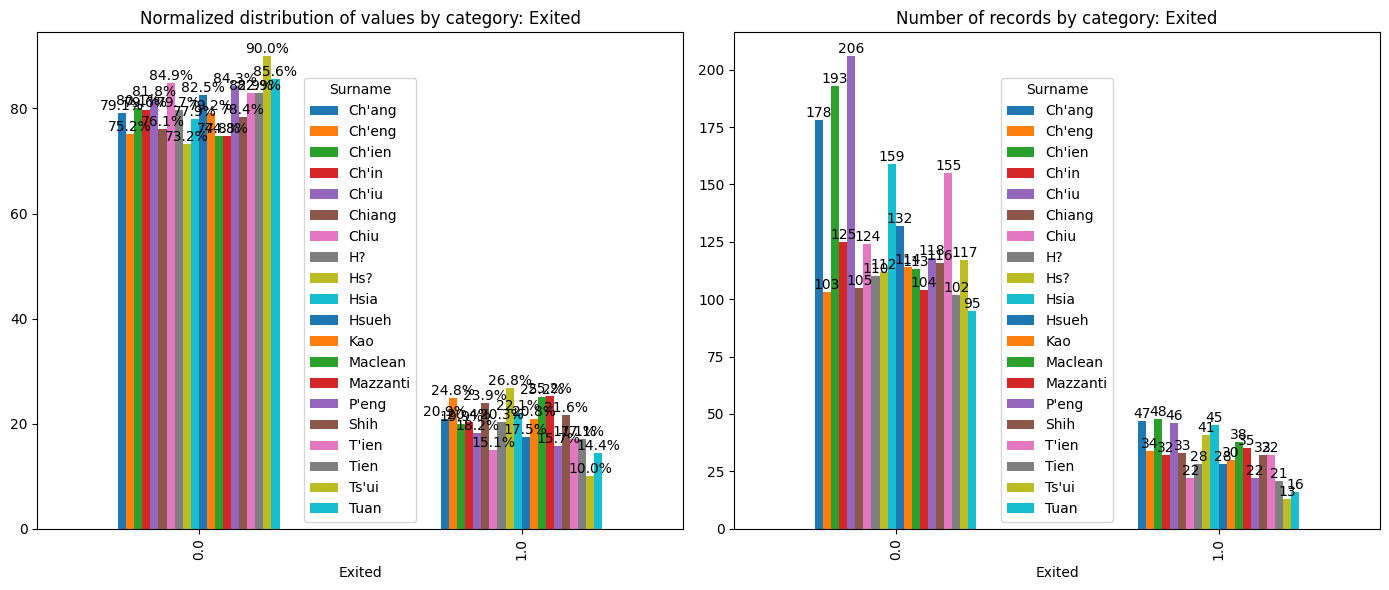

In [5]:
top20 = raw_df["Surname"].value_counts().head(20).index

draw_bi_cat_countplot(
    raw_df[raw_df["Surname"].isin(top20)], target_col, "Surname"
)

 - Among the 20 most popular "Surname" values, there is no strong correlation with the "Exited" column. As expected, "Surname" appears to be useless for model training. However, we could include the top 10, 20, or 30 surnames as one-hot encoded features in some experiments.

### Numeric cols

#### Histograms

In [6]:
from mlpeople.visualization.distributions.histograms import plt_histogram

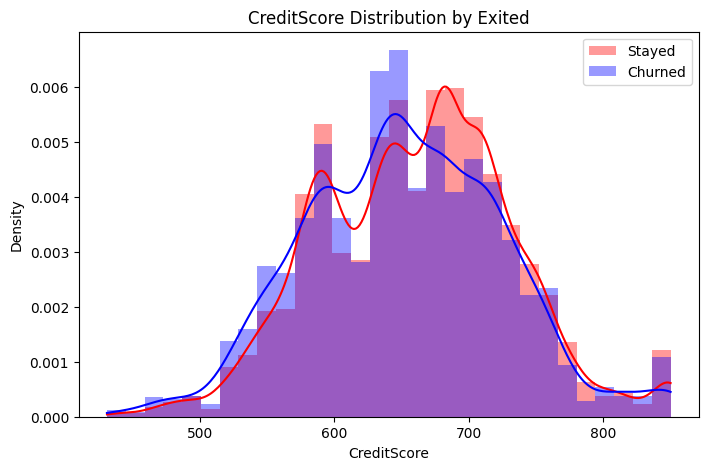

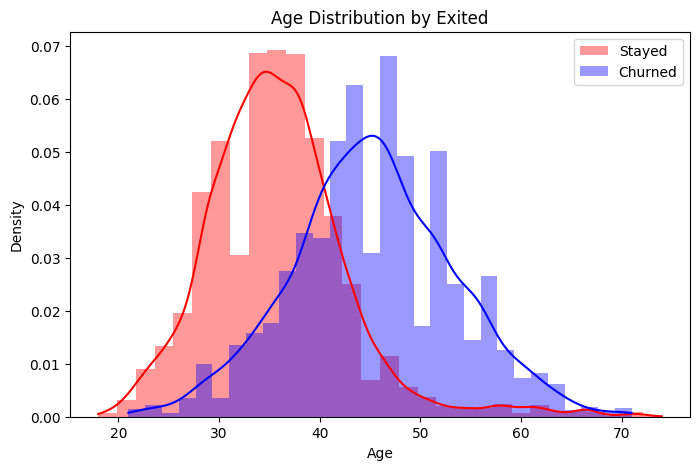

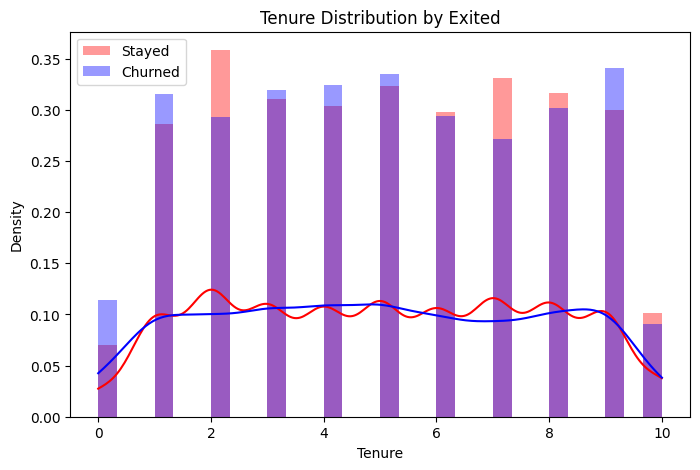

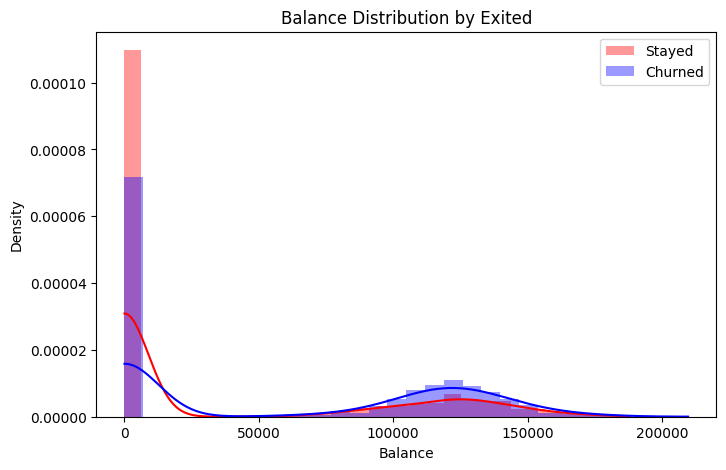

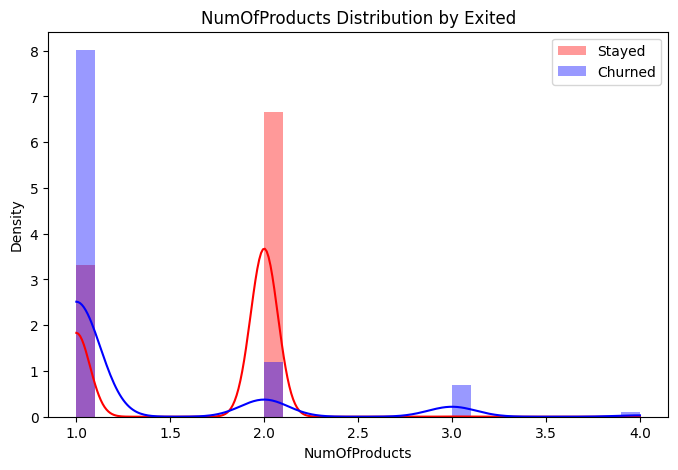

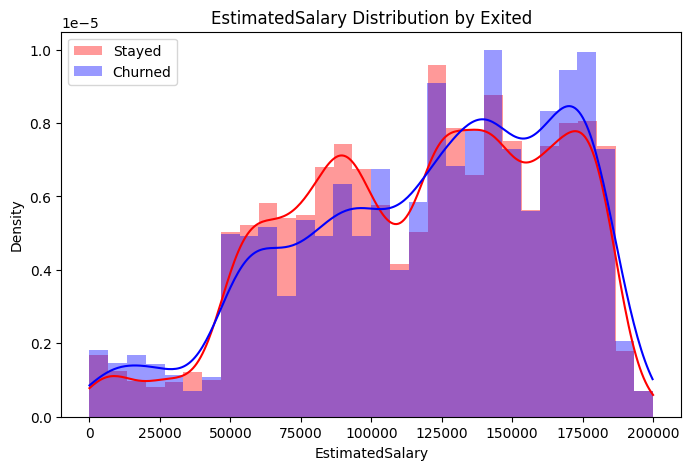

In [7]:
numeric_cols = raw_df.select_dtypes(include="number").columns
binary_numeric_cols = [
    col for col in raw_df.select_dtypes(include="number").columns
    if raw_df[col].nunique() == 2
]
skip_cols = [target_col, 'CustomerId']

for col in numeric_cols:
    if col not in skip_cols and col not in binary_numeric_cols:
        plt_histogram(
            raw_df,
            col=col,
            color_col=target_col,
            labels={0: "Stayed", 1: "Churned"},
            density=True
        )

 - "Age" is definetely make difference
 - "Balance" might require more investigation cause of special distribution

#### Numeric Binary 

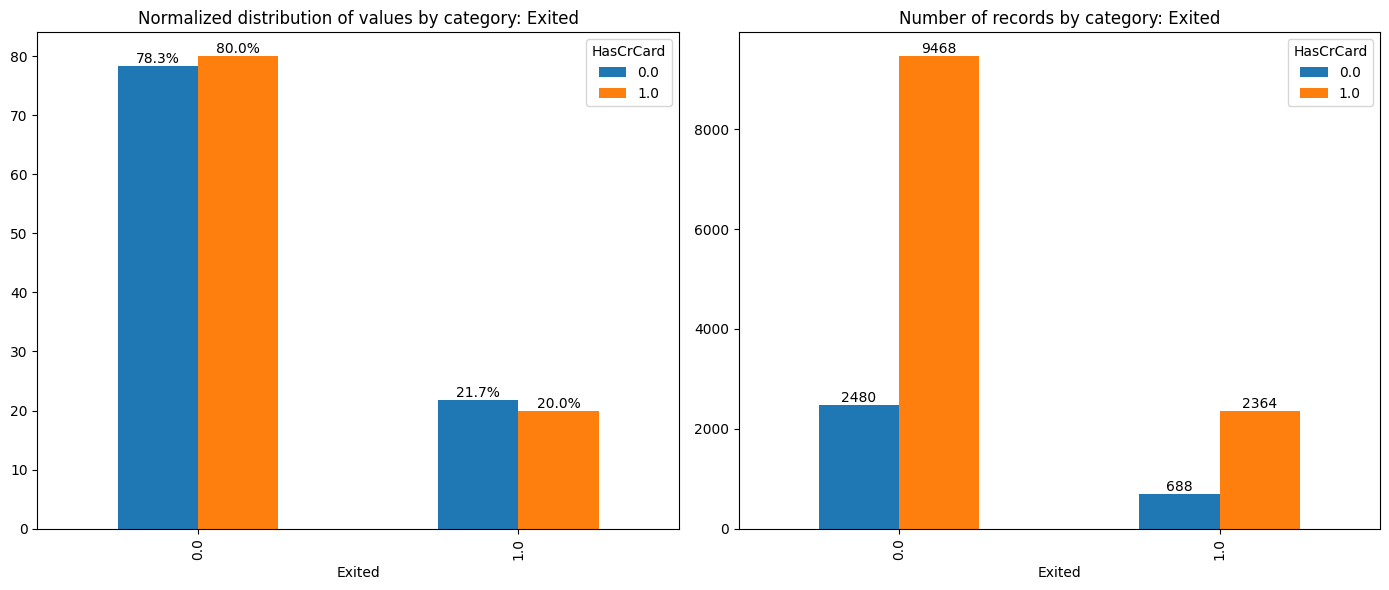

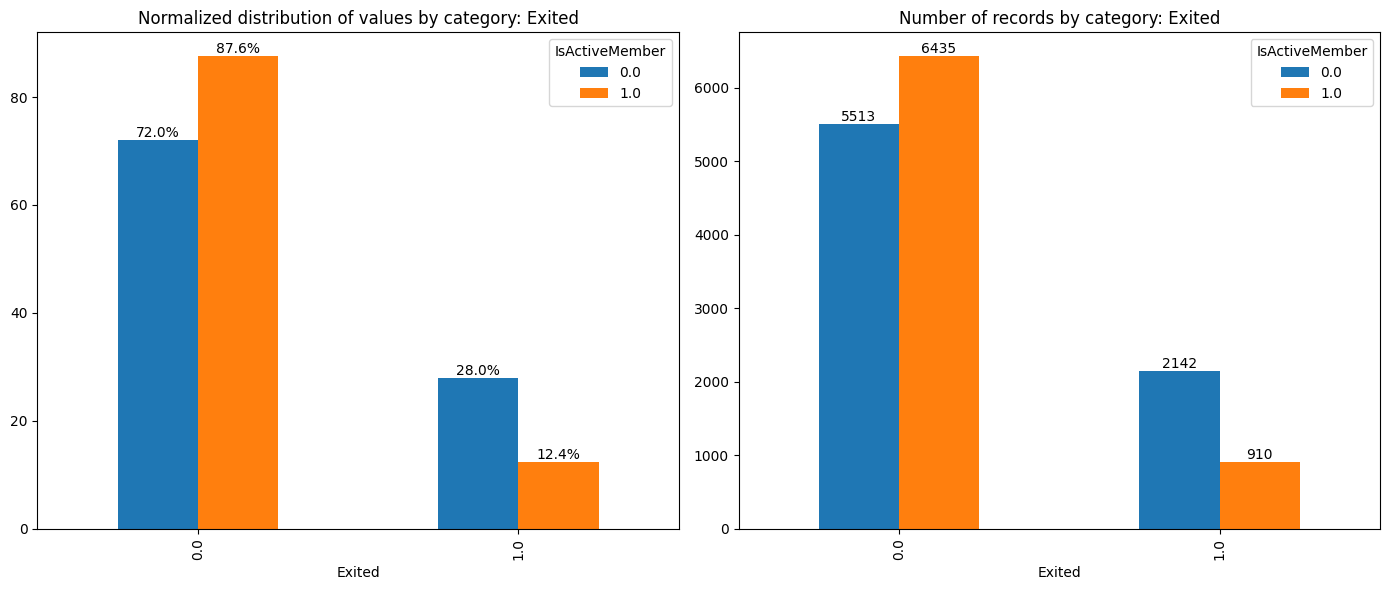

In [8]:
for col in binary_numeric_cols:
    if col not in skip_cols:
        draw_bi_cat_countplot(
            raw_df, target_col, col
        )

 - "iSActiveMemeber" seems to have impact on target. 
 - "HasCrCard" does not have noticeable impact

#### Balance col

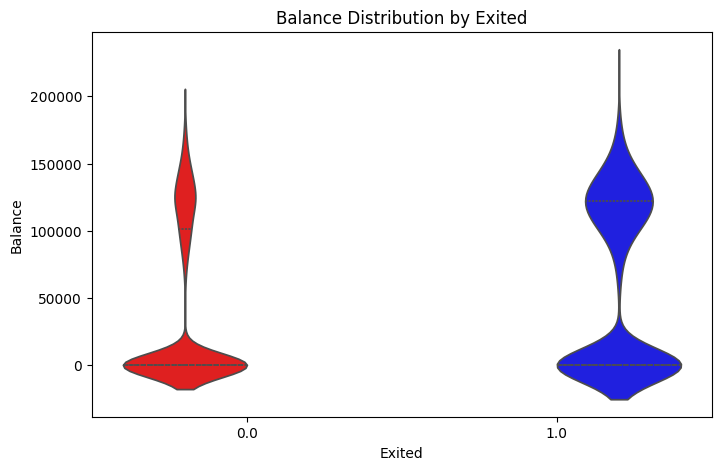

In [9]:
from mlpeople.visualization.distributions.violins import plt_violin

plt_violin(raw_df, 'Balance', x=target_col)

In [10]:
percentage = (raw_df['Balance'] == 0).mean() * 100
print(f"Percentage of rows where Balance = 0: {percentage:.2f}%")

Percentage of rows where Balance = 0: 64.95%


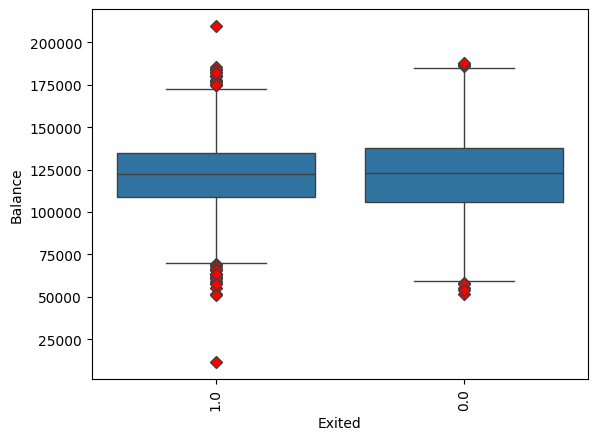

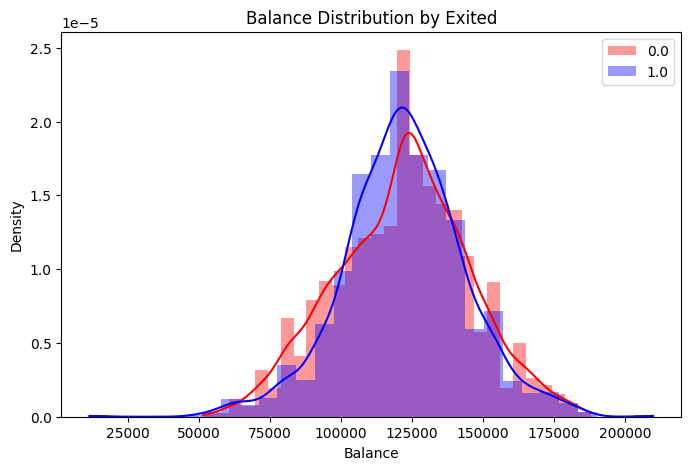

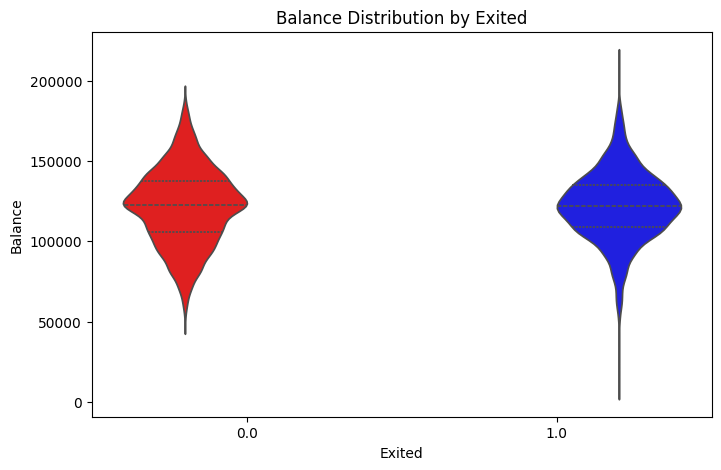

In [11]:
from mlpeople.visualization.categorical.boxplots import draw_boxplot

draw_boxplot(raw_df[raw_df['Balance'] > 0], target_col, 'Balance')
plt_histogram(raw_df[raw_df['Balance'] > 0], 'Balance', color_col=target_col)
plt_violin(raw_df[raw_df['Balance'] > 0], 'Balance', x=target_col)

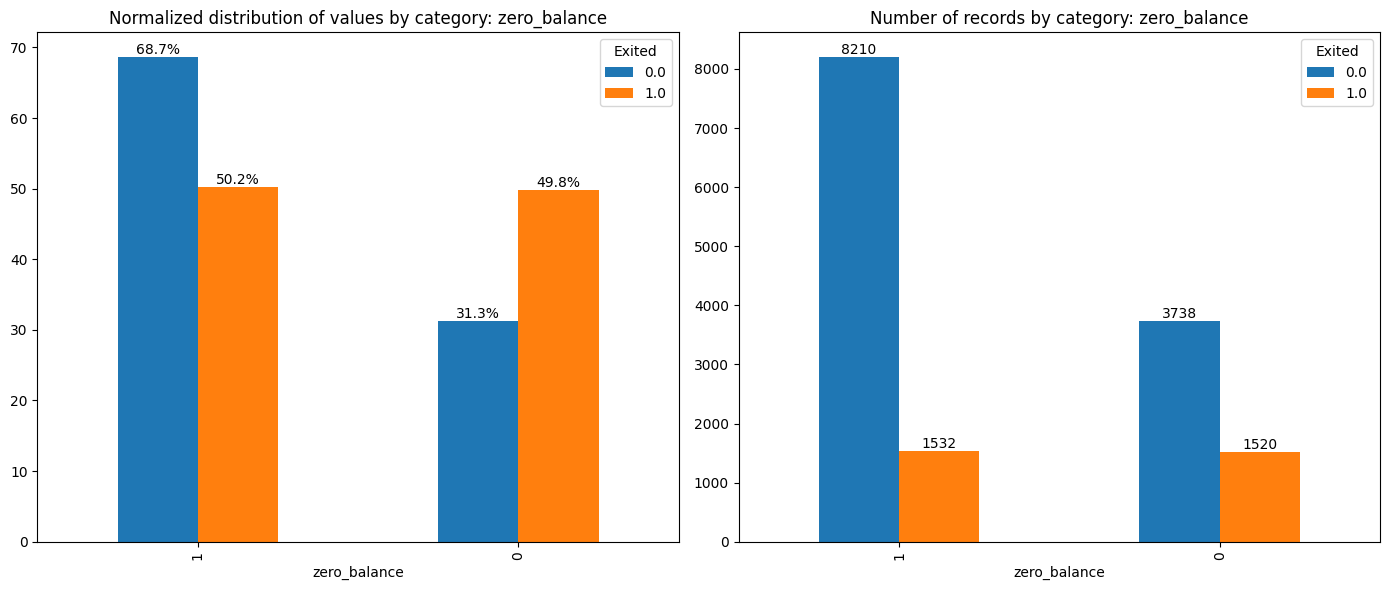

In [12]:
draw_bi_cat_countplot(
    df=raw_df.assign(zero_balance=(raw_df['Balance'] == 0).astype(int)),
    column='zero_balance',
    hue_column=target_col
)

 - 64% of rows have a Balance of 0.
 - Among the non-zero Balance values, there is no noticeable correlation with the target.
 - Having a zero Balance appears to impact the target: customers with zero Balance are more likely to stay.

## Scale Data

In [13]:
from sklearn.preprocessing import StandardScaler

# Make a copy to avoid modifying original
df_scaled = raw_df.copy()

numeric_cols = df_scaled.select_dtypes(include='number').columns.tolist()
# filter out target_col and binary cols
binary_numeric_cols = [col for col in binary_numeric_cols if col != target_col]
numeric_cols = [col for col in numeric_cols if col != target_col and col not in binary_numeric_cols]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform only numeric columns
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# df_scaled now has scaled numeric columns; target is unchanged
df_scaled.head()


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,0.654793,Nwankwo,0.263736,France,Male,-1.063459,-0.369254,-0.715438,2.647186,1.0,0.0,1.374102,0.0
1,-0.305995,Ch'in,0.388298,France,Female,-0.455045,-1.449718,-0.715438,0.768505,0.0,1.0,-1.181829,0.0
2,0.311725,Thompson,0.319097,France,Female,1.735245,0.351055,-0.715438,2.647186,0.0,0.0,1.352881,1.0
3,-0.337740,Macleod,1.301748,Germany,Male,0.761783,0.351055,0.680071,0.768505,1.0,0.0,0.953860,0.0
4,-0.426157,Hsia,-1.590845,Germany,Female,2.100294,-1.809873,1.088613,-1.110175,1.0,0.0,1.285643,1.0


## Features and coefs statistics

In [14]:
import pandas as pd
import statsmodels.api as sm

def logistic_stats(X, y):
    """
    Fit logistic regression using statsmodels and return:
      1) DataFrame with coef, p-values, confidence intervals
      2) statsmodels summary object
    """
    X = sm.add_constant(X)
    model = sm.Logit(y, X).fit(disp=False)
    
    coef_df = pd.DataFrame({
        'coef': round(model.params, 3),
        'pval': round(model.pvalues, 3),
        'conf_low': round(model.conf_int()[0], 3),
        'conf_high': round(model.conf_int()[1], 3)
    })
    
    return coef_df, model.summary()



#### Only numeric

In [15]:
X = df_scaled[numeric_cols + binary_numeric_cols]
y = df_scaled[target_col]

coef_df, summary = logistic_stats(X, y)

print(coef_df.sort_values(by='pval'))   # Table with coef, p-values, CI
print(summary)   # Full statsmodels summary

                  coef   pval  conf_low  conf_high
const           -1.236  0.000    -1.349     -1.123
CreditScore     -0.130  0.000    -0.179     -0.081
Age              1.279  0.000     1.224      1.334
Balance          0.112  0.000     0.061      0.162
NumOfProducts   -0.651  0.000    -0.705     -0.597
IsActiveMember  -1.309  0.000    -1.415     -1.203
CustomerId      -0.163  0.001    -0.256     -0.069
HasCrCard       -0.162  0.007    -0.280     -0.045
EstimatedSalary  0.063  0.012     0.014      0.112
Tenure          -0.021  0.391    -0.070      0.027
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                15000
Model:                          Logit   Df Residuals:                    14990
Method:                           MLE   Df Model:                            9
Date:                Sat, 07 Feb 2026   Pseudo R-squ.:                  0.3165
Time:                        21:19:43   Log-

 - "CustomerId" is stat significant ?
 - "Tenure" is not stat significant 

### Zero Balance

Use zero balance flag and remove Balance column.
Also drop Tenure which is not significant on previous step

In [16]:
X = df_scaled[numeric_cols + binary_numeric_cols].copy()
X['zero_balance'] = (X['Balance'] == X['Balance'].min()).astype(int)
y = df_scaled[target_col]

coef_df, summary = logistic_stats(X.drop(['Balance', 'Tenure'], axis=1), y)

print(coef_df.sort_values(by='pval'))   # Table with coef, p-values, CI
print(summary)   # Full statsmodels summary

                  coef   pval  conf_low  conf_high
const           -1.071  0.000    -1.202     -0.940
CreditScore     -0.131  0.000    -0.180     -0.082
Age              1.279  0.000     1.225      1.334
NumOfProducts   -0.647  0.000    -0.701     -0.592
IsActiveMember  -1.309  0.000    -1.415     -1.203
zero_balance    -0.253  0.000    -0.360     -0.146
CustomerId      -0.163  0.001    -0.257     -0.070
HasCrCard       -0.164  0.006    -0.281     -0.046
EstimatedSalary  0.062  0.013     0.013      0.111
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                15000
Model:                          Logit   Df Residuals:                    14991
Method:                           MLE   Df Model:                            8
Date:                Sat, 07 Feb 2026   Pseudo R-squ.:                  0.3167
Time:                        21:19:43   Log-Likelihood:                -5178.1
converged:      

 - maybe we can keep only boolean "zero_balance" instead of numeric "Balance" ?

### Gender and Geography 

In [17]:
from mlpeople.eda.categorization import (
    get_fitted_one_hot_encoder,
    get_low_cardinality_cats,
    keep_only_top_n,
)

In [18]:
cat_cols = get_low_cardinality_cats(df_scaled, threshold=10)
encoder = get_fitted_one_hot_encoder(
    df_scaled,
    cat_cols
)

X = df_scaled[numeric_cols + binary_numeric_cols].copy()
X[encoder.get_feature_names_out()] = encoder.transform(
    df_scaled[cat_cols]
)
y = df_scaled[target_col]

coef_df, summary = logistic_stats(X, y)

print(coef_df.sort_values(by='pval'))   # Table with coef, p-values, CI
print(summary)   # Full statsmodels summary

                    coef   pval     conf_low    conf_high
CreditScore       -0.143  0.000       -0.194       -0.092
Age                1.266  0.000        1.209        1.322
Balance           -0.310  0.000       -0.379       -0.241
NumOfProducts     -0.732  0.000       -0.787       -0.677
IsActiveMember    -1.319  0.000       -1.429       -1.209
Gender_Male       -0.850  0.000       -0.953       -0.748
CustomerId        -0.151  0.002       -0.249       -0.054
HasCrCard         -0.191  0.002       -0.314       -0.069
EstimatedSalary    0.065  0.013        0.014        0.116
Tenure            -0.018  0.488       -0.069        0.033
const             -0.437  1.000 -2083761.291  2083760.417
Geography_France  -0.660  1.000 -2083761.515  2083760.194
Geography_Germany  0.942  1.000 -2083759.912  2083761.796
Geography_Spain   -0.719  1.000 -2083761.573  2083760.135
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observa

 - multicollinearity example for Geography_ 

In [19]:
df_scaled["IsGermany"] = (df_scaled["Geography"] == "Germany").astype(int)
df_scaled["IsFrance"] = (df_scaled["Geography"] == "France").astype(int)

cat_cols = ["Gender"]

encoder = get_fitted_one_hot_encoder(
    df_scaled,
    cat_cols
)

X = df_scaled[numeric_cols + binary_numeric_cols + ["IsGermany", "IsFrance"]].copy()
X[encoder.get_feature_names_out()] = encoder.transform(
    df_scaled[cat_cols]
)
y = df_scaled[target_col]

coef_df, summary = logistic_stats(X, y)

print(coef_df.sort_values(by='pval'))   # Table with coef, p-values, CI
print(summary)   # Full statsmodels summary

                  coef   pval  conf_low  conf_high
const           -1.156  0.000    -1.320     -0.992
CreditScore     -0.143  0.000    -0.194     -0.092
Age              1.266  0.000     1.209      1.322
Balance         -0.310  0.000    -0.379     -0.241
NumOfProducts   -0.732  0.000    -0.787     -0.677
IsActiveMember  -1.319  0.000    -1.429     -1.209
IsGermany        1.661  0.000     1.477      1.846
Gender_Male     -0.850  0.000    -0.953     -0.748
CustomerId      -0.151  0.002    -0.249     -0.054
HasCrCard       -0.191  0.002    -0.314     -0.069
EstimatedSalary  0.065  0.013     0.014      0.116
IsFrance         0.058  0.395    -0.076      0.193
Tenure          -0.018  0.488    -0.069      0.033
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                15000
Model:                          Logit   Df Residuals:                    14987
Method:                           MLE   Df Model:

 - IsGermany seems to be enough

### Surname ?

In [20]:
top_n_surnames = 20
cat_cols = ["Gender", "Surname"]

df_scaled_top_n_surnames= keep_only_top_n(df_scaled, "Surname", top_n_surnames)

df_scaled_top_n_surnames["IsGermany"] = (df_scaled_top_n_surnames["Geography"] == "Germany").astype(int)

encoder = get_fitted_one_hot_encoder(
    df_scaled_top_n_surnames,
    cat_cols,
    drop="first"
)

X = df_scaled_top_n_surnames[numeric_cols + binary_numeric_cols + ["IsGermany"]].copy()
X[encoder.get_feature_names_out()] = encoder.transform(
    df_scaled_top_n_surnames[cat_cols]
)
y = df_scaled_top_n_surnames[target_col]

coef_df, summary = logistic_stats(X, y)

print(coef_df.sort_values(by='pval'))   # Table with coef, p-values, CI
print(summary)   # Full statsmodels summary

                   coef   pval  conf_low  conf_high
const            -1.239  0.000    -1.678     -0.800
IsGermany         1.621  0.000     1.463      1.778
IsActiveMember   -1.331  0.000    -1.441     -1.220
NumOfProducts    -0.734  0.000    -0.789     -0.679
Balance          -0.311  0.000    -0.381     -0.242
Gender_Male      -0.851  0.000    -0.954     -0.747
Age               1.270  0.000     1.213      1.327
CreditScore      -0.146  0.000    -0.197     -0.095
HasCrCard        -0.191  0.002    -0.313     -0.068
CustomerId       -0.149  0.003    -0.247     -0.051
EstimatedSalary   0.065  0.012     0.014      0.116
Surname_Ts'ui    -0.850  0.038    -1.654     -0.045
Surname_Maclean   0.651  0.040     0.031      1.271
Surname_Hs?       0.547  0.092    -0.089      1.183
Surname_Chiang    0.474  0.158    -0.184      1.133
Surname_Ch'eng    0.441  0.191    -0.221      1.104
Surname_Chiu     -0.437  0.232    -1.153      0.280
Surname_H?        0.404  0.238    -0.267      1.074
Surname_Mazz

 - Surname brings kind of noise - 2 of 20 most popular are stats significant

In [20]:
# todo